<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº7
#### Mathilde d'Hébrail





### Configuracion e inicio de la simulacion

In [136]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)
import matplotlib.pyplot as plt
import scipy.signal as sg
import warnings
warnings.filterwarnings('ignore')
import math
from scipy.stats import binom
import cmath
import scipy.io as sio
from scipy.io.wavfile import write
import scipy.integrate as integrate
import scipy.special as special
import sounddevice as sd
import pandas as pd


#Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})



def vertical_flaten(a):

    return a.reshape(a.shape[0], 1)

# ECG

##### Reading the ECG

[('ecg_lead', (1129116, 1), 'double'), ('qrs_pattern1', (113, 1), 'double'), ('heartbeat_pattern1', (411, 1), 'double'), ('heartbeat_pattern2', (441, 1), 'double'), ('qrs_detections', (1903, 1), 'double')]


Text(0.5, 1.0, 'Heartbeat patern 2')

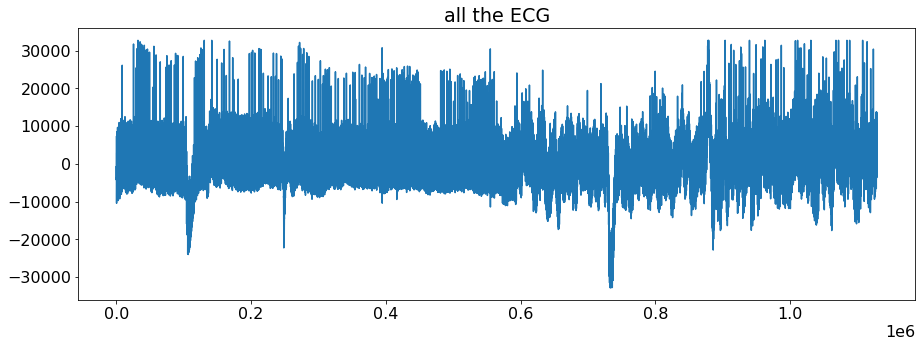

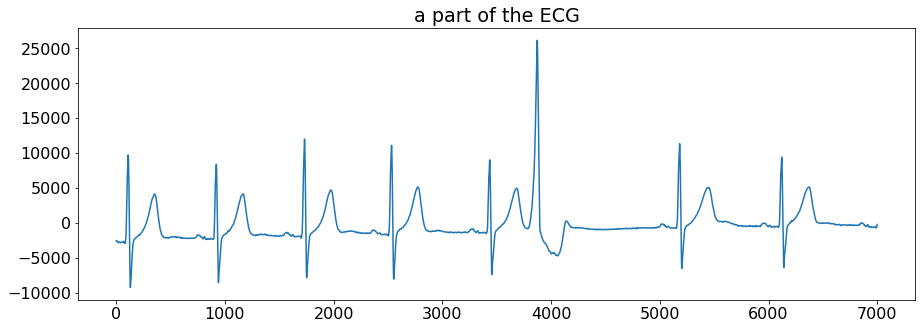

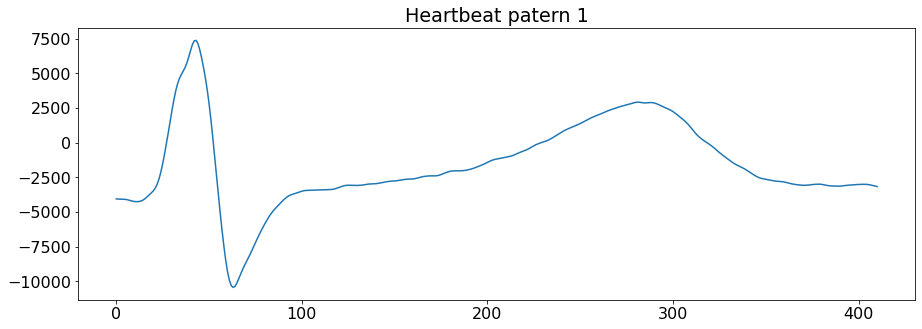

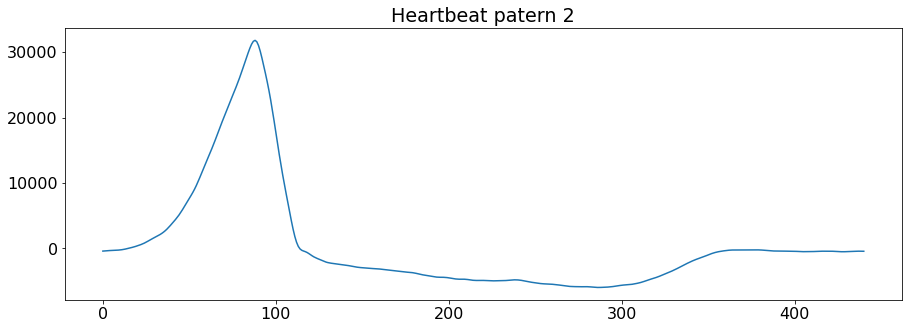

In [137]:
fs_ecg = 1000 # Hz

# para listar las variables que hay en el archivo
print(sio.whosmat('ECG_TP4.mat'))
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])
hb_2 = vertical_flaten(mat_struct['heartbeat_pattern2'])

plt.figure(1)
plt.plot(ecg_one_lead)
plt.title("all the ECG")

plt.figure(2)
plt.plot(ecg_one_lead[5000:12000])
plt.title("a part of the ECG")

plt.figure(3)
plt.plot(hb_1)
plt.title("Heartbeat patern 1")

plt.figure(4)
plt.plot(hb_2)
plt.title("Heartbeat patern 2")


###### Periodograma y Welch

In [138]:
def normalize(d):
    # d is a (n x dimension) np array
    somme = sum(d)
    d = d/somme
    return d

N=10000

df_ecg = fs_ecg/N # resolución espectral


dd = 0.5

data = ecg_one_lead[:N]
data = data.flatten()


# No paramétricos
pP = np.abs(np.fft.fft(data))
f, pW = sg.welch(data, fs=fs_ecg, nfft=N, window='hanning', nperseg=int(np.round(N/5)) )




# grilla de sampleo frecuencial
ff = np.arange(0, fs_ecg//2, df_ecg).flatten()


pPnorm = normalize(pP)
pWnorm = normalize(pW)

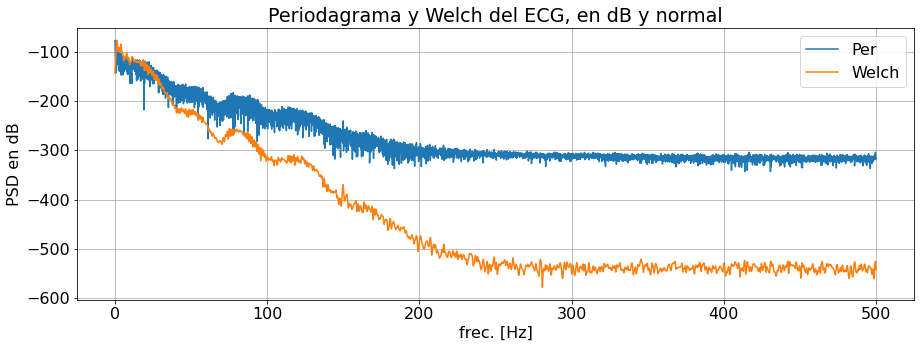

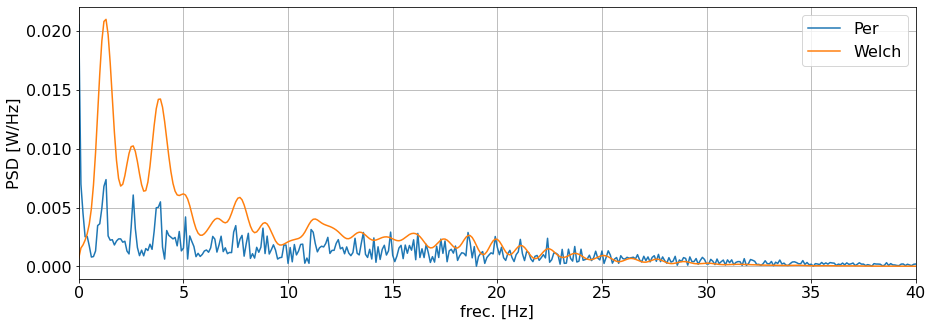

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [139]:
#%%

plt.figure(5)
plt.clf()


plt.plot(ff,20*np.log(pPnorm[:len(ff)]), label= "Per" )
plt.plot(f, 20*np.log(pWnorm), label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD en dB')
plt.grid(which='both', axis='both')
plt.title("Periodagrama y Welch del ECG, en dB y normal")


axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')

#%%


plt.figure(6)
plt.clf()
plt.plot(ff, pPnorm[:len(ff)], label= "Per" )
plt.plot(f, pWnorm, label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')
plt.xlim([0,40])

axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')
plt.show()



Paire = 0
i=0
while Paire <0.5:
        Paire += pPnorm[i]*df_ecg
        i+=1
Ancho_de_banda_ECG_Per=i*df_ecg
        
Waire = 0
j=0
while Waire <0.5:
        Waire += pWnorm[j]*df_ecg
        j+=1
Ancho_de_banda_ECG_Wer=j*df_ecg


# La cucaracha

##### Reading la cucaracha

In [ ]:
#%%

fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
plt.figure(7)
plt.plot(wav_data)
sd.play(wav_data, fs_audio)


N=10000

df_audio = fs_audio/N # resolución espectral


dd = 0.5

data = wav_data[:N]
data = data.flatten()


# No paramétricos
pP = np.abs(np.fft.fft(data))
f, pW = sg.welch(data, fs=fs_audio, nfft=N, window='hanning', nperseg=int(np.round(N/5)) )




# grilla de sampleo frecuencial
ff = np.arange(0, fs_audio//2, df_audio).flatten()


pPnorm = normalize(pP)
pWnorm = normalize(pW)

##### Periodograma y Welch

In [ ]:
#%%

plt.figure(8)
plt.clf()


plt.plot(ff,20*np.log(pPnorm[:len(ff)]), label= "Per" )
plt.plot(f, 20*np.log(pWnorm), label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD en dB')
plt.grid(which='both', axis='both')
plt.title("Periodagrama y Welch de la Cucaracha, en dB y normal")


axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')

#%%


plt.figure(9)
plt.clf()
plt.plot(ff, pPnorm[:len(ff)], label= "Per" )
plt.plot(f, pWnorm, label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')
plt.xlim([-3,1500])

axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')
plt.show()



Paire = 0
i=1
while Paire <0.90:
        Paire += pPnorm[i]*df_audio
        i+=1
Ancho_de_banda_Cuc_Per=i*df_audio
        
Waire = 0
j=1
while Waire <0.90:
        Waire += pWnorm[j]*df_audio
        j+=1
Ancho_de_banda_Cuc_Wer=j*df_audio

# El Silbido

##### Reading el Silbido

In [ ]:
#%%

fs_audio, wav_data = sio.wavfile.read('silbido.wav')

plt.figure(10)
plt.plot(wav_data)
sd.play(wav_data, fs_audio)


N=10000

df_audio = fs_audio/N # resolución espectral


dd = 0.5

data = wav_data[:N]
data = data.flatten()


# No paramétricos
pP = np.abs(np.fft.fft(data))
f, pW = sg.welch(data, fs=fs_audio, nfft=N, window='hanning', nperseg=int(np.round(N/5)) )




# grilla de sampleo frecuencial
ff = np.arange(0, fs_audio//2, df_audio).flatten()


pPnorm = normalize(pP)
pWnorm = normalize(pW)


##### Periodograma y Welch

In [ ]:
#%%

plt.figure(11)
plt.clf()


plt.plot(ff,20*np.log(pPnorm[:len(ff)]), label= "Per" )
plt.plot(f, 20*np.log(pWnorm), label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD en dB')
plt.grid(which='both', axis='both')
plt.title("Periodagrama y Welch del Silbido, en dB y normal")


axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')

#%%


plt.figure(12)
plt.clf()
plt.plot(ff, pPnorm[:len(ff)], label= "Per" )
plt.plot(f, pWnorm, label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')
plt.xlim([-3,5000])

axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')
plt.show()



Paire = 0
i=1
while Paire <0.90:
        Paire += pPnorm[i]*df_audio
        i+=1
Ancho_de_banda_Silb_Per=i*df_audio
        
Waire = 0
j=1
while Waire <0.90:
        Waire += pWnorm[j]*df_audio
        j+=1
Ancho_de_banda_Silb_Wer=j*df_audio


# La Prueba

##### Reading La Prueba

In [ ]:
#%%

fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')

plt.figure(13)
plt.plot(wav_data)
sd.play(wav_data, fs_audio)


N=10000

df_audio = fs_audio/N # resolución espectral


dd = 0.5

data = wav_data[:N]
data = data.flatten()


# No paramétricos
pP = np.abs(np.fft.fft(data))
f, pW = sg.welch(data, fs=fs_audio, nfft=N, window='hanning', nperseg=int(np.round(N/5)) )




# grilla de sampleo frecuencial
ff = np.arange(0, fs_audio//2, df_audio).flatten()


pPnorm = normalize(pP)
pWnorm = normalize(pW)

##### Periodograma y Welch

In [ ]:
#%%

plt.figure(14)
plt.clf()


plt.plot(ff,20*np.log(pPnorm[:len(ff)]), label= "Per" )
plt.plot(f, 20*np.log(pWnorm), label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD en dB')
plt.grid(which='both', axis='both')
plt.title("Periodagrama y Welch de la Prueba, en dB y normal")


axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')

#%%


plt.figure(15)
plt.clf()
plt.plot(ff, pPnorm[:len(ff)], label= "Per" )
plt.plot(f, pWnorm, label = "Welch" )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')
plt.xlim([-3,1500])

axes_hdl = plt.gca()
axes_hdl.legend(loc='upper right')
plt.show()



Paire = 0
i=1
while Paire <0.90:
        Paire += pPnorm[i]*df_audio
        i+=1
Ancho_de_banda_Prueba_Per=i*df_audio
        
Waire = 0
j=1
while Waire <0.90:
        Waire += pWnorm[j]*df_audio
        j+=1
Ancho_de_banda_Prueba_Wer=j*df_audio

In [ ]:
tableau = np.array([[Ancho_de_banda_ECG_Per, Ancho_de_banda_ECG_Wer], [Ancho_de_banda_Cuc_Per, Ancho_de_banda_Cuc_Wer], [Ancho_de_banda_Silb_Per, Ancho_de_banda_Silb_Wer], [Ancho_de_banda_Prueba_Per, Ancho_de_banda_Prueba_Wer]])
fig, ax = plt.subplots(1, 1)
column_labels = ["Ancho de Banda calculado con el Periodograma", "Ancho de Banda calculado con el metodo de Welch"]
df = pd.DataFrame(tableau, columns=column_labels)
ax.axis("tight")
ax.axis("off")
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=["ECG", "Cucaracha", "Silbido", "Prueba"],
    loc="center",
    colWidths = [0.4, 0.4]
)

# Augmenter la hauteur des lignes
table.auto_set_font_size(False)
table.set_fontsize(12)
for i in range(len(df)+1):  # Inclut l'en-tête
    for j in range(len(column_labels)):  # Inclut les étiquettes de lignes
        cell = table[i, j]
        cell.set_height(0.1)  # Ajuste la hauteur des lignes (valeur en fractions de la figure)

plt.show()